<a href="https://colab.research.google.com/github/shakil1819/LLM-RAG-SCiRev/blob/main/LLM_RAG_SciRev_00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


In [47]:
!pip install -Uqqq pip --progress-bar off
!pip install -qqq langchain==0.0.173 --progress-bar off
!pip install -qqq chromadb==0.3.23 --progress-bar off
!pip install -qqq pypdf==3.8.1 --progress-bar off
!pip install -qqq pygpt4all==1.1.0 --progress-bar off
!pip install -qqq pdf2image==1.16.3 --progress-bar off
!pip install llama-index
!pip install llama-cpp-python
!pip install langchain openai faiss-cpu tiktoken

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llama-index 0.8.53.post3 requires langchain>=0.0.303, but you have langchain 0.0.173 which is incompatible.
  Using cached langchain-0.0.324-py3-none-any.whl.metadata (15 kB)
Using cached langchain-0.0.324-py3-none-any.whl (1.9 MB)
  Attempting uninstall: langchain
    Found existing installation: langchain 0.0.173
    Uninstalling langchain-0.0.173:
      Successfully uninstalled langchain-0.0.173


In [48]:
!pip install llmhub
!pip install gpt4all

In [51]:
#!pip install PyMuPDF==1.16.14
!pip install PyPDF2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.1 MB/s eta 0:00:00


In [68]:
from PyPDF2 import PdfReader

# Creating a PDF reader object
pdf_file = '/content/drive/MyDrive/Colab Notebooks/~Pictures/2023279689.pdf'
pdf_reader = PdfReader(open(pdf_file, 'rb'))

# Printing the number of pages in the PDF file
num_pages = len(reader.pages)
print(f'Total number of pages: {num_pages}')

# Loop through all pages and extract text
for page_num in range(num_pages):
    page = reader.pages[page_num]
    text = page.extract_text()
    print(f'Page {page_num + 1} Text:')
    print(text)


Total number of pages: 6
Page 1 Text:
CycleGAN-Based Data Augmentation with CNN
and Vision Transformers (ViT) Models for
Improved Maize Leaf Disease Classification
Syed Taha Yeasin Ramadan
Department of Computer Science and Engineering
Military Institute of Science and Technology (MIST)
Dhaka, Bangladesh
tahayeasin11@gmail.comTanjim Sakib
Department of Computer Science and Engineering
Military Institute of Science and Technology (MIST)
Dhaka, Bangladesh
tsakib77@gmail.com
Md. Ahsan Rahat
Department of Computer Science and Engineering
Military Institute of Science and Technology (MIST)
Dhaka, Bangladesh
ahsanrahat11@gmail.comShakil Mosharrof
Department of Computer Science and Engineering
Military Institute of Science and Technology (MIST)
Dhaka, Bangladesh
shakilmrf8@gmail.com
Abstract —Crop losses pose a serious danger to global food
security, and this problem also affects maize crops. To success-
fully address this issue, precise disease detection techniques
are required. However, a m

In [ ]:
from langchain.chains import RetrievalQA
from langchain.document_loaders import PyPDFLoader
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.llms import GPT4All
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma
from pdf2image import convert_from_path
from langchain.prompts import ChatPromptTemplate
from langchain.chat_models import ChatOpenAI
from operator import itemgetter
from langchain.prompts import ChatPromptTemplate
from langchain.chat_models import ChatOpenAI
from langchain.embeddings import OpenAIEmbeddings
from langchain.schema.output_parser import StrOutputParser
from langchain.schema.runnable import RunnablePassthrough, RunnableLambda
from langchain.vectorstores import FAISS
from langchain.schema.runnable import RunnableMap
from langchain.schema import format_document

In [ ]:
!wget https://gpt4all.io/models/gguf/gpt4all-falcon-q4_0.gguf

--2023-10-27 05:44:29--  https://gpt4all.io/models/gguf/gpt4all-falcon-q4_0.gguf
Resolving gpt4all.io (gpt4all.io)... 172.67.71.169, 104.26.0.159, 104.26.1.159, ...
Connecting to gpt4all.io (gpt4all.io)|172.67.71.169|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4210419040 (3.9G)
Saving to: ‘gpt4all-falcon-q4_0.gguf’

gpt4all-falcon-q4_0 100%[===================>]   3.92G  37.7MB/s    in 96s     

2023-10-27 05:46:05 (41.9 MB/s) - ‘gpt4all-falcon-q4_0.gguf’ saved [4210419040/4210419040]



In [ ]:
images = convert_from_path("/content/drive/MyDrive/Colab Notebooks/~Pictures/2023279689.pdf", dpi=88)
len(images)

6

In [ ]:
loader = PyPDFLoader("/content/drive/MyDrive/Colab Notebooks/~Pictures/2023279689.pdf")
documents = loader.load_and_split()

In [ ]:
len(documents)

12

In [ ]:
#print(documents[0].page_content)

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1024, chunk_overlap=32)
texts = text_splitter.split_documents(documents)

In [ ]:
len(texts)

37

In [ ]:
print(texts[0].page_content)

CycleGAN-Based Data Augmentation with CNN
and Vision Transformers (ViT) Models for
Improved Maize Leaf Disease Classification
Syed Taha Yeasin Ramadan
Department of Computer Science and Engineering
Military Institute of Science and Technology (MIST)
Dhaka, Bangladesh
tahayeasin11@gmail.comTanjim Sakib
Department of Computer Science and Engineering
Military Institute of Science and Technology (MIST)
Dhaka, Bangladesh
tsakib77@gmail.com
Md. Ahsan Rahat
Department of Computer Science and Engineering
Military Institute of Science and Technology (MIST)
Dhaka, Bangladesh
ahsanrahat11@gmail.comShakil Mosharrof
Department of Computer Science and Engineering
Military Institute of Science and Technology (MIST)
Dhaka, Bangladesh
shakilmrf8@gmail.com
Abstract —Crop losses pose a serious danger to global food
security, and this problem also affects maize crops. To success-
fully address this issue, precise disease detection techniques
are required. However, a major hurdle to developing reliable


In [ ]:
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

In [ ]:
db = Chroma.from_documents(texts, embeddings, persist_directory="db")

In [ ]:
from langchain.llms import GPT4All
model_n_ctx = 1000
model_n_batch=8
model_path = "./gpt4all-falcon-q4_0.gguf"
llm = GPT4All(model=model_path, max_tokens=model_n_ctx, backend='gptj', n_batch=model_n_batch, verbose=False)

In [ ]:
qa = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=db.as_retriever(search_kwargs={"k": 3}),
    return_source_documents=True,
    verbose=False,
)

In [45]:
res=qa("title")
print(res)

{'query': 'title', 'result': ' The answer to the question is not provided in the given context.', 'source_documents': [Document(page_content='VGG16 97.93 0.1366 0.9793 0.9793 0.9793\nCycleGAN ResNet50V2 97.61 0.1574 0.9762 0.9761 0.9761\nXception 97.50 0.1291 0.9754 0.975 0.975\nMobileNetV2 98.37 0.0684 0.9837 0.9837 0.9837\nDenseNet169 98.48 0.0652 0.9848 0.9848 0.9848', metadata={'source': '/content/drive/MyDrive/Colab Notebooks/~Pictures/2023279689.pdf', 'page': 4}), Document(page_content='DenseNet169, VGG16, VGG19, Xception, MobileNetV2, and\nemerging vision transformer models, such as ViT-B/16 and\nViT-B/32, with a focus on the two critical classes of maize leaf\ndiseases, blight and common rust. Notably, DenseNet169 per-', metadata={'source': '/content/drive/MyDrive/Colab Notebooks/~Pictures/2023279689.pdf', 'page': 0}), Document(page_content='facilitates this transformation. In contrast, Generator B to A\nproduces pictures of maize leaves that appear to be in good\ncondition fro

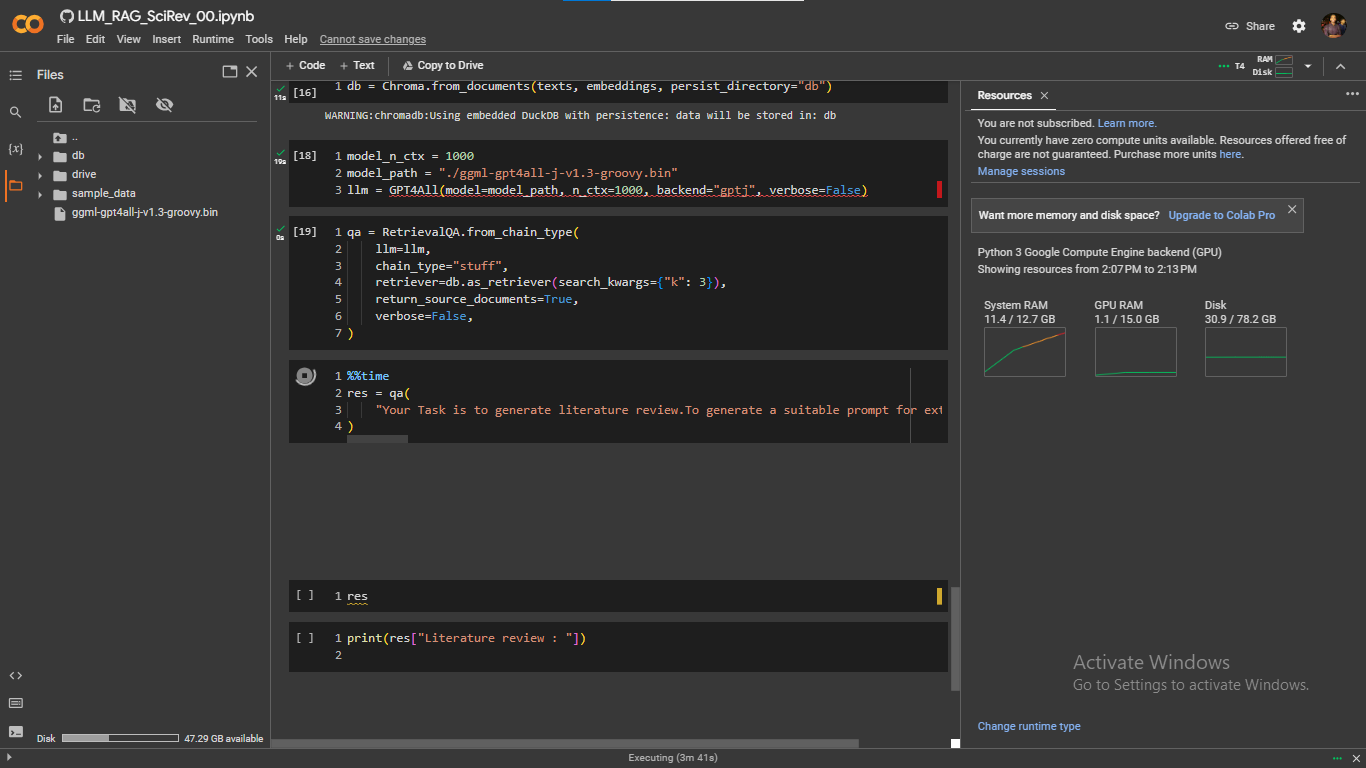
